Jason Yu
Data Ethics Spring 23

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from random import sample 
import scipy.stats as st
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from matplotlib.lines import Line2D
from matplotlib import cycler
from scipy.stats import pearsonr

# DSP: Amazon

Questions to Consider:
- Are users comfortable with the service's privacy defaults? i.e., do Company X users complain about the privacy terms?
- Are users aware of the data Company X collects about them?
- Suppose the users did not know the data Company X collects about them. Would their privacy concerns be more serious after explaining to them that Company X does, indeed, collect data about them?
- Will users' privacy concerns grow if they see the data Company X collects about each of them?

In [2]:
#import data collected via Google Form
amzn_data = "DSP Responses.csv"
amzn_df = pd.read_csv(amzn_data)

#Remove first two columns to protect participant privacy:
amzn_df=amzn_df.drop(['Unnamed: 0','Unnamed: 1'],axis=1)
#enumerate columns with strings
col_names = ['Q0','Q1','Q2','Q2.1','Q2.2','Q3','Q4','Q5']
amzn_df.columns = col_names
amzn_df.head()

,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
0,Frequently,2 (Vague Details),4 (I am unconcerned),Yes,Basic Account Information,"Addresses, Birthdays, Customer Reviews, Order/...","2 (I am worried, but not enough to take action)",Maybe
1,Frequently,2 (Vague Details),3 (I am unsure),Yes,Basic Account Information,"Addresses, Advertising, (Amazon Devices) Alexa...",3 (I am unsure),No
2,Infrequently,1 (Not at all),4 (I am unconcerned),Yes,No,"Addresses, Order/Return History, Phone Numbers","2 (I am worried, but not enough to take action)",Yes
3,Frequently,2 (Vague Details),"2 (I am worried, but not enough to take action)",Yes,Basic Account Information,"Addresses, Advertising, (Amazon Devices) Alexa...",1 (I have or want to submit complaints),Yes
4,Frequently,1 (Not at all),5 (My data is safe with Amazon),Yes,Basic Account Information,"Addresses, Order/Return History, Prime Membership",4 (I am unconcerned),No


In [3]:
#enumerate some of the more troublesome variables
def enum(col):
    for i in range(len(amzn_df)):
        amzn_df[col][i] = amzn_df[col][i][0]

#enumerate Q1, Q2, Q4
#Note these were enumerated as strings of numbers
enum('Q1')
enum('Q2')
enum('Q4')
amzn_df.head()

,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
0,Frequently,2,4,Yes,Basic Account Information,"Addresses, Birthdays, Customer Reviews, Order/...",2,Maybe
1,Frequently,2,3,Yes,Basic Account Information,"Addresses, Advertising, (Amazon Devices) Alexa...",3,No
2,Infrequently,1,4,Yes,No,"Addresses, Order/Return History, Phone Numbers",2,Yes
3,Frequently,2,2,Yes,Basic Account Information,"Addresses, Advertising, (Amazon Devices) Alexa...",1,Yes
4,Frequently,1,5,Yes,Basic Account Information,"Addresses, Order/Return History, Prime Membership",4,No


## Consideration of Outlying Reponses

In [4]:
def outly(col,val):
    out = amzn_df.copy()
    out = out[out[col]==val]
    return out

In [5]:
#Check people 'Very Familiar' with Amazon Privacy Policy (Q1)
outly('Q1','5')

,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
37,Frequently,5,1,Yes,Data Subject Access Request,"Addresses, Advertising, (Amazon Devices) Alexa...",1,No


Responder is a frequent user who is very familiar with privacy policy and has submited complaints. Knows how to access advanced Amazon data about the user. As expected their response to Q2 does not change.

In [6]:
#Check people who 'Not at All' Use Amazon (Q0)
outly('Q0','Not at All')

,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
11,Not at All,1,5,No,No,"Addresses, Website Interaction",4,No
33,Not at All,1,3,No,No,"Addresses, Order/Return History, Search History",2,No


In [7]:
#Check people who 'Already Complain' (Q2)
outly('Q2','1')

,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
30,Infrequently,4,1,Yes,Basic Account Information,"Addresses, Advertising, (Amazon Devices) Alexa...",1,No
37,Frequently,5,1,Yes,Data Subject Access Request,"Addresses, Advertising, (Amazon Devices) Alexa...",1,No


In [77]:
#Check people who 'Are Worried but don't act' (Q2)
outly('Q2','2')

,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
3,Frequently,2,2,Yes,Basic Account Information,"Addresses, Advertising, (Amazon Devices) Alexa...",1,Yes
7,Frequently,4,2,Yes,Data Subject Access Request,"Addresses, Advertising, (Amazon Devices) Alexa...",1,Yes
13,Frequently,3,2,Yes,Basic Account Information,"Addresses, Order/Return History, Prime Members...",2,Yes
20,Frequently,2,2,Yes,Basic Account Information,"Addresses, Advertising, Order/Return History, ...",2,Maybe
34,Infrequently,2,2,Yes,Basic Account Information,"Addresses, Order/Return History, Prime Members...",2,Yes
36,Infrequently,1,2,Yes,Basic Account Information,"Addresses, Order/Return History, Phone Numbers...",2,No
40,Frequently,2,2,Yes,Basic Account Information,"Addresses, Amazon Media, Phone Numbers, Search...",1,Yes
42,Infrequently,1,2,Yes,Basic Account Information,"Addresses, Email Interactions, Order/Return Hi...",2,No
45,Frequently,2,2,Yes,Basic Account Information,"Addresses, Amazon Media, Email Interactions, O...",2,No
47,Frequently,3,2,Yes,Basic Account Information,"Addresses, Amazon Media, Order/Return History,...",2,Maybe


In [8]:
#Check people who 'Data is Safe with Amazon' (Q2)
outly('Q2','5')

,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
4,Frequently,1,5,Yes,Basic Account Information,"Addresses, Order/Return History, Prime Membership",4,No
11,Not at All,1,5,No,No,"Addresses, Website Interaction",4,No
18,Frequently,1,5,Yes,Basic Account Information,"Addresses, (Amazon Devices) Alexa/Echo/Kindle/...",2,Yes
27,Frequently,3,5,Yes,Basic Account Information,"Addresses, Order/Return History, Phone Numbers...",3,No
32,Frequently,1,5,Yes,Basic Account Information,"Addresses, Birthdays, Order/Return History, Ph...",3,Yes


In [9]:
#Check people who 'Don't Know Amazon Collects their data' (Q2.1)
outly('Q2.1','No')

,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
11,Not at All,1,5,No,No,"Addresses, Website Interaction",4,No
33,Not at All,1,3,No,No,"Addresses, Order/Return History, Search History",2,No


In [10]:
#Check people who don't know how to access their data (Q2.2)
outly('Q2.2','No')

,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
2,Infrequently,1,4,Yes,No,"Addresses, Order/Return History, Phone Numbers",2,Yes
11,Not at All,1,5,No,No,"Addresses, Website Interaction",4,No
33,Not at All,1,3,No,No,"Addresses, Order/Return History, Search History",2,No


In [11]:
#Check people who know how to access advanced data
outly('Q2.2','Data Subject Access Request')

,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
7,Frequently,4,2,Yes,Data Subject Access Request,"Addresses, Advertising, (Amazon Devices) Alexa...",1,Yes
37,Frequently,5,1,Yes,Data Subject Access Request,"Addresses, Advertising, (Amazon Devices) Alexa...",1,No


In [12]:
#Check people who are unconcerned or feel data is safe after example:
outly('Q4','5')
#No examples of 5
outly('Q4','4')


,Q0,Q1,Q2,Q2.1,Q2.2,Q3,Q4,Q5
4,Frequently,1,5,Yes,Basic Account Information,"Addresses, Order/Return History, Prime Membership",4,No
11,Not at All,1,5,No,No,"Addresses, Website Interaction",4,No


## Graphs of Individual Questions 

In [47]:
#Graph Function
cmap = plt.cm.coolwarm
def graph(df,col):
    plt.rcParams['font.sans-serif'] = "Comic Sans MS"
    plt.rcParams['axes.facecolor']='grey'
    responses = [1,2,3,4,5]
    counts = [0,0,0,0,0]
    for i in range(len(df[col])):
        counts[int(df[col][i])-1] +=1
    
    fig = plt.figure(figsize=(5,5))
    fig.set_facecolor('white')

    max_el = max(counts)
    span = range(0,math.ceil(max_el)+1)
    plt.yticks(span)

    plt.xlabel('Responses',fontweight='bold',fontsize=14)
    plt.ylabel('Counts',fontweight='bold',fontsize=14)

    return plt.bar(responses,counts,width=0.6)


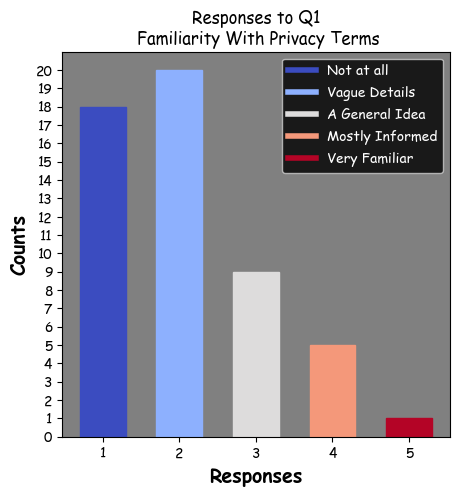

In [48]:
#Graph of Q1 Results
Q1_graph = graph(amzn_df,'Q1')
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.25), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(.75), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]
Q1_graph[0].set_color(cmap(0.))
Q1_graph[1].set_color(cmap(.25))
Q1_graph[2].set_color(cmap(.5))
Q1_graph[3].set_color(cmap(.75))
Q1_graph[4].set_color(cmap(1.))
plt.title('Responses to Q1\n Familiarity With Privacy Terms')
plt.legend(custom_lines,['Not at all','Vague Details','A General Idea','Mostly Informed','Very Familiar'],facecolor='black',labelcolor='white')
plt.show()

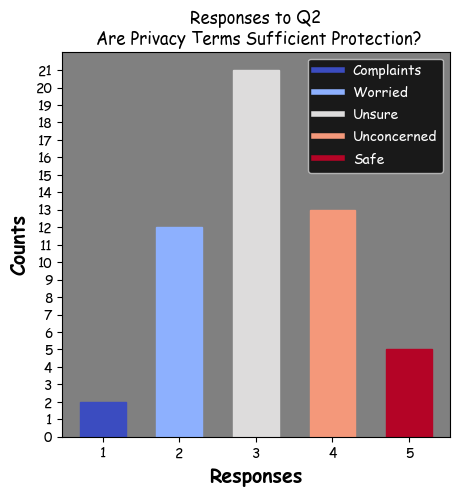

In [49]:
#Graph of Q2 Results
Q2_graph = graph(amzn_df,'Q2')
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.25), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(.75), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]
Q2_graph[0].set_color(cmap(0.))
Q2_graph[1].set_color(cmap(.25))
Q2_graph[2].set_color(cmap(.5))
Q2_graph[3].set_color(cmap(.75))
Q2_graph[4].set_color(cmap(1.))
plt.title('Responses to Q2\n Are Privacy Terms Sufficient Protection?')
plt.legend(custom_lines,['Complaints','Worried','Unsure','Unconcerned','Safe'],facecolor='black',labelcolor='white')
plt.show()

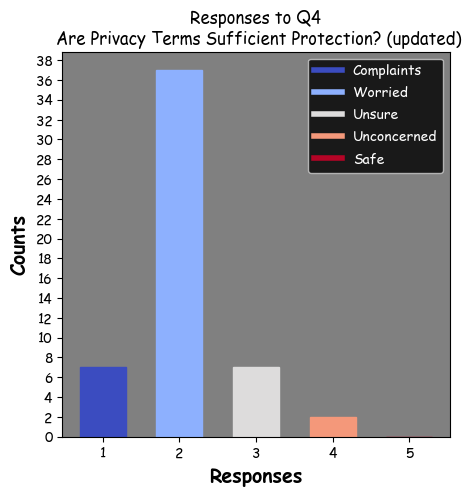

In [50]:
#Graph of Q4 Responses:
Q4_graph = graph(amzn_df,'Q4')
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.25), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(.75), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]
Q4_graph[0].set_color(cmap(0.))
Q4_graph[1].set_color(cmap(.25))
Q4_graph[2].set_color(cmap(.5))
Q4_graph[3].set_color(cmap(.75))
Q4_graph[4].set_color(cmap(1.))
plt.yticks(range(0,40,2))
plt.title('Responses to Q4\n Are Privacy Terms Sufficient Protection? (updated)')
plt.legend(custom_lines,['Complaints','Worried','Unsure','Unconcerned','Safe'],facecolor='black',labelcolor='white')
plt.show()

## Relationship Testing:

In [17]:
#Dummy encoding: 
amzn = pd.get_dummies(amzn_df.copy())
amzn.head()

,Q0_Frequently,Q0_Infrequently,Q0_Not at All,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q2_1,Q2_2,...,"Q3_Order/Return History, Search History","Q3_Order/Return History, Search History, Website Interaction","Q3_Order/Return History, Website Interaction",Q4_1,Q4_2,Q4_3,Q4_4,Q5_Maybe,Q5_No,Q5_Yes
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


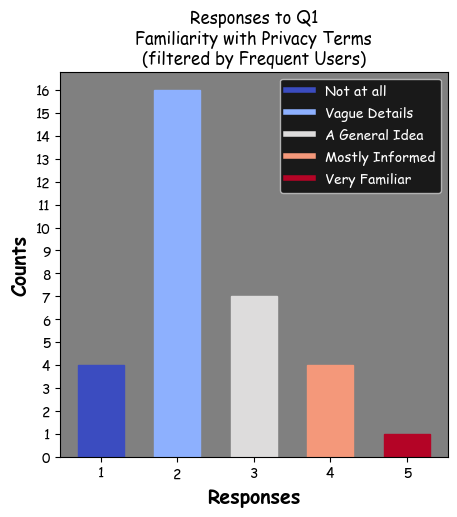

In [83]:
#Graph of participants who use amazon frequently and their repsponses to Q1
frequent = amzn_df[amzn_df['Q0']=='Frequently']
frequent =frequent.reset_index()
fr_graph = graph(frequent,'Q1')
fr_graph[0].set_color(cmap(0.))
fr_graph[1].set_color(cmap(.25))
fr_graph[2].set_color(cmap(.5))
fr_graph[3].set_color(cmap(.75))
fr_graph[4].set_color(cmap(1.))
plt.title('Responses to Q1\n Familiarity with Privacy Terms \n(filtered by Frequent Users)')
plt.legend(custom_lines,['Not at all','Vague Details','A General Idea','Mostly Informed','Very Familiar'],facecolor='black',labelcolor='white')
plt.show()

In [89]:
#Compare awareness and confortability (Q1 and Q2)
#Find the correlation coefficient

Q1_data = amzn_df['Q1'].astype(int)
Q2_data = amzn_df['Q2'].astype(int)
coor, _ = pearsonr(Q1_data,Q2_data)
print('Pearsons correlation: %.3f' % coor)

#Do this for users who frequently use amazon
Q1_data = amzn_df[amzn_df['Q0']=='Frequently']['Q1'].astype(int)
Q2_data = amzn_df[amzn_df['Q0']=='Frequently']['Q2'].astype(int)
coor, _ = pearsonr(Q1_data,Q2_data)
print('Pearsons correlation: %.3f' % coor)


Pearsons correlation: -0.214
Pearsons correlation: -0.278


In [72]:
#Average decrease in confidence: (Compare Q2 and Q4)
#Bootstrap with confidece lvl 95%, sample size 80%
Q4_data = amzn_df['Q4'].astype(int)

rep = 1000
vals = []
for i in range(rep):
    samp = amzn_df.sample(41)
    Q2_data = samp['Q2'].astype(int)
    Q4_data = samp['Q4'].astype(int)
    val = np.mean(Q4_data-Q2_data)
    vals = np.append(vals,val)
print([np.percentile(vals,5),np.percentile(vals,95)])

[-1.146341463414634, -0.9512195121951219]
